# Financial data ananysis with Pandas and Yfinance

## comparing stocks

In [1]:
# Import lirbaries
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
yf.pdr_override() 

import seaborn as sns
sns.set()

### Import stocks

Recently I've been investing in US stocks market, I was investing in penny stocks which made me lose lot of money...
So I've decided to invest in stock index. Let's find out which way is better to invest in S&P 500 or US total stock market.

In [2]:
# Load data 
spy = pdr.get_data_yahoo('SPY', start = '2001-06-01') # S&P 500
vti = pdr.get_data_yahoo('VTI', start = '2001-06-01') # US total stock market

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
spy.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-05-31,125.430000,126.760002,125.260002,125.949997,85.839279,9874200
2001-06-01,126.199997,127.099998,125.120003,126.730003,86.370834,8848300
2001-06-04,126.800003,127.430000,126.080002,127.339996,86.786575,5623500
2001-06-05,127.489998,129.229996,127.269997,128.800003,87.781609,9115400
2001-06-06,128.830002,128.830002,127.360001,127.730003,87.052422,12064900


In [4]:
vti.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15,55.424999,56.005001,55.174999,55.665001,38.530975,1067400
2001-06-18,55.814999,55.915001,55.310001,55.310001,38.285255,282600
2001-06-19,56.150002,56.165001,55.235001,55.465000,38.392555,1777600
2001-06-20,55.375000,56.075001,55.375000,56.049999,38.797489,476000
2001-06-21,56.000000,56.724998,55.875000,56.500000,39.108959,240400


In [5]:
# drop Volume
spy_tmp = spy.drop(columns='Volume')
vti_tmp = vti.drop(columns='Volume')

In [6]:
spy.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### Plot data

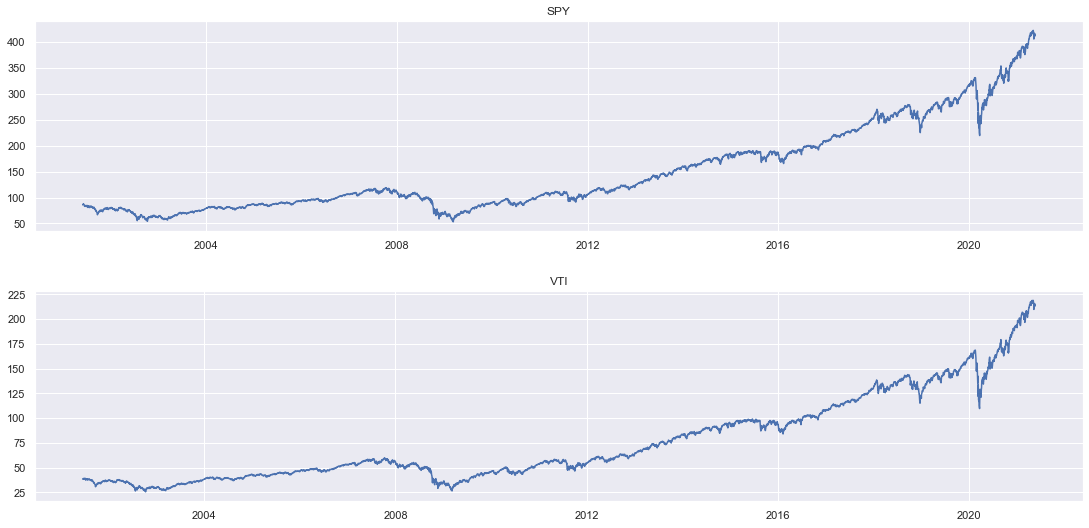

In [8]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
fig.tight_layout(pad=3.0)

ax1.plot(spy.index, spy['Adj Close'])
ax2.plot(vti.index, vti['Adj Close'])


ax1.set_title('SPY')
ax2.set_title('VTI')
plt.show()

They look very same to my eyes, however if you look at the yaxis, pricing is different between SPLG and ITOT. We can't say easily if those have same profit. Let's calculate daily percentage change to see.

### Daily percentage change

In [9]:
def daily_percent_change(ticker):
    dpc = ((ticker['Adj Close'] / ticker['Adj Close'].shift(1) -1) *100)
    dpc.iloc[0] = 0
    return dpc

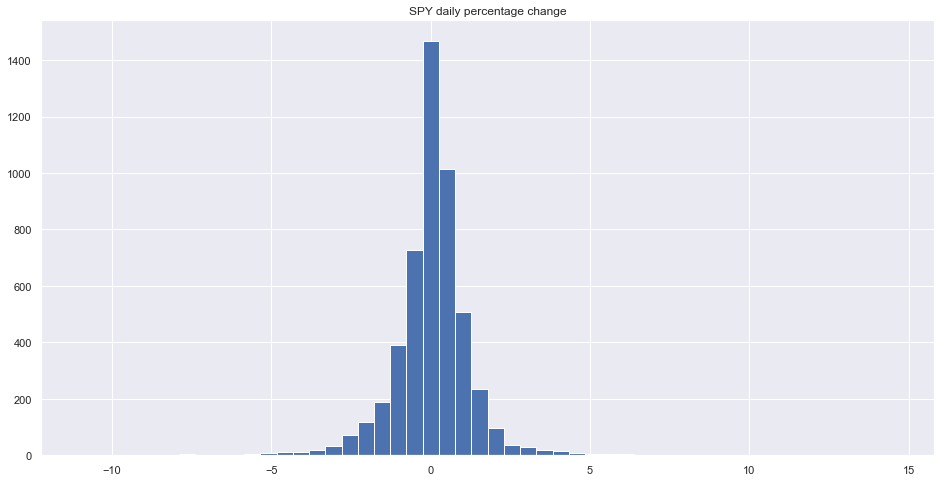

In [12]:
spy_dpc = daily_percent_change(spy)
plt.figure(figsize=(16,8))
plt.hist(spy_dpc, bins=50)
plt.grid(True)
plt.title("SPY daily percentage change")
plt.show()

In [13]:
spy_dpc.describe()

count    5025.000000
mean        0.038905
std         1.226519
min       -10.942361
25%        -0.425272
50%         0.070393
75%         0.581849
max        14.519763
Name: Adj Close, dtype: float64

### Cumulative sum

DPC is daily percentage change, if want to see total changes we need to calculate cumulative sum.

`cumsum()` is a sequence of partial sums of a given data set. It is used to show the summation of data as it grows with time.

In [14]:
# Calculate cumulative sum
spy_dpc_cs = daily_percent_change(spy)
vti_dpc_cs = daily_percent_change(vti)

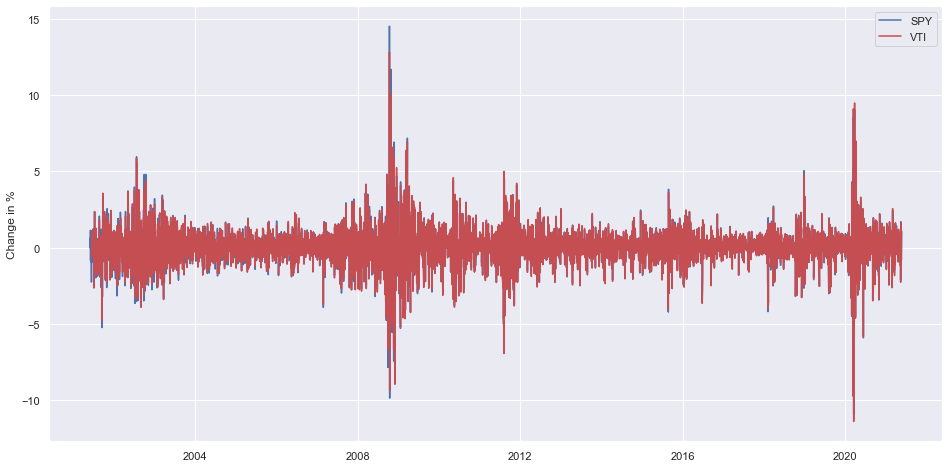

In [16]:
# Plot data

plt.figure(figsize=(16,8))
plt.plot(spy.index, spy_dpc_cs, 'b', label='SPY')
plt.plot(vti.index, vti_dpc_cs, 'r', label='VTI')
plt.ylabel('Change in %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [17]:
np.mean(np.abs(spy_dpc_cs - vti_dpc_cs))

0.11213062698104054

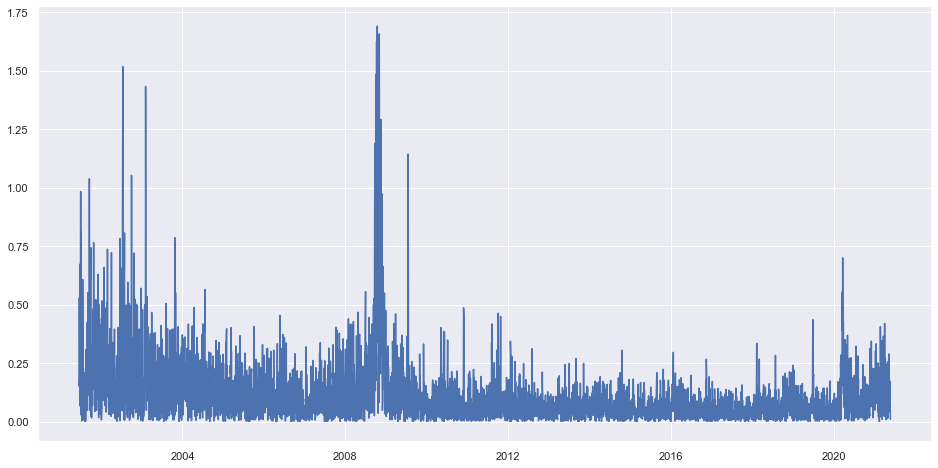

In [19]:
plt.figure(figsize=(16, 8))

plt.plot(np.abs(spy_dpc_cs - vti_dpc_cs))
plt.show()

## Maximum Drawdown

A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.

MDD is calculated by (Min Value - Max Value)/Min Value

https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp

[*********************100%***********************]  1 of 1 completed


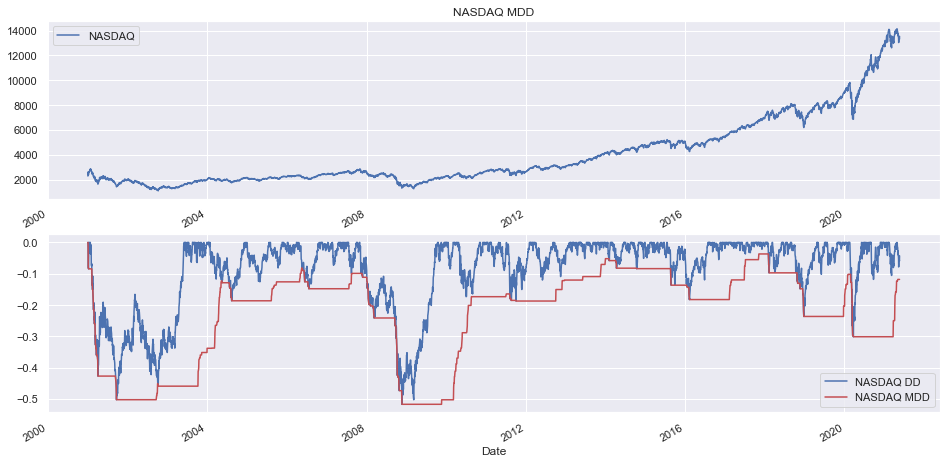

In [20]:
nasdaq = pdr.get_data_yahoo('^IXIC', '2001-01-01') # NASDAQ index from 2001-01-01
window = 252 # Stock market open 252 days per 365 days

peak = nasdaq['Adj Close'].rolling(window, min_periods=1).max()
drawdown = nasdaq['Adj Close']/peak - 1.0 # To calculate how much it changed compared to peak
max_dd = drawdown.rolling(window, min_periods=1).min() # calculate max_dd 1 year cycle

plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
nasdaq['Adj Close'].plot(label='NASDAQ', title='NASDAQ MDD', grid=True, legend=True)
plt.subplot(2,1,2)
drawdown.plot(label='NASDAQ DD', c='b', grid=True, legend=True)
max_dd.plot(label='NASDAQ MDD', c='r', grid=True, legend=True)
plt.show()


Now we see NASDAQ didn't just have smooth ride, let's see what's the highest drawdown and when was it.

In [30]:
print('Highest drawdown value was ', '{:.2%}'.format(max_dd.min()))

Highest drawdown value was  -51.69%


In [40]:
print('During this period ', max_dd[max_dd==max_dd.min()])

During this period  Date
2008-11-20   -0.516916
2008-11-21   -0.516916
2008-11-24   -0.516916
2008-11-25   -0.516916
2008-11-26   -0.516916
                ...   
2009-11-13   -0.516916
2009-11-16   -0.516916
2009-11-17   -0.516916
2009-11-18   -0.516916
2009-11-19   -0.516916
Name: Adj Close, Length: 252, dtype: float64


## Regression Analysis

